In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Establish data path & read in CSV
data_path = "Resources/full_clean_dataset.csv"
df = pd.read_csv(data_path) 

# drop null values if any
df = df.dropna()

# Create new df with vaues needed to answer question, "Does household income affect type of cases?"
income_type_df = df[['Region','County', 'Total Number of Households', 'Median income (dollars)', 'Abandonment', 'Emotional Abuse',
                     'Medical Neglect', 'Neglectful Supervision', 'Physical Abuse', 'Physical Neglect',
                     'Refusal To Accept Parental Responsibility', 'Sex Trafficking', 'Sexual Abuse']]
# Check work
income_type_df.head()

,Region,County,Total Number of Households,Median income (dollars),Abandonment,Emotional Abuse,Medical Neglect,Neglectful Supervision,Physical Abuse,Physical Neglect,Refusal To Accept Parental Responsibility,Sex Trafficking,Sexual Abuse
0,5-Beaumont,Angelina,"34,276","58,180",3.0,32.0,63.0,684.0,226.0,113.0,5.0,2.0,255.0
1,7-Austin,Bastrop,"37,278","72,663",1.0,45.0,46.0,690.0,254.0,77.0,8.0,3.0,250.0
2,7-Austin,Bell,"143,361","62,137",24.0,154.0,292.0,3655.0,1219.0,455.0,67.0,12.0,852.0
3,8-San Antonio,Bexar,"754,632","65,854",43.0,832.0,1224.0,15509.0,5221.0,1766.0,186.0,59.0,4594.0
4,4-Tyler,Bowie,"35,469","49,771",5.0,34.0,63.0,722.0,248.0,167.0,10.0,3.0,240.0


In [2]:
# Remove commas from numbers (Ex. 5,000 ==> 5000)
income_type_df["Median income (dollars)"] = income_type_df["Median income (dollars)"].replace(",", "", regex = True)
income_type_df["Total Number of Households"] = income_type_df["Total Number of Households"].replace(",", "", regex = True)

# Convert from string to float datatype
income_type_df = income_type_df.astype({"Median income (dollars)" : 'float'})
income_type_df = income_type_df.astype({"Total Number of Households" : 'float'})

#Check work
income_type_df.dtypes

C:\Users\mojo\AppData\Local\Temp\ipykernel_15864\2129504751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_type_df["Median income (dollars)"] = income_type_df["Median income (dollars)"].replace(",", "", regex = True)
C:\Users\mojo\AppData\Local\Temp\ipykernel_15864\2129504751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_type_df["Total Number of Households"] = income_type_df["Total Number of Households"].replace(",", "", regex = True)


Region                                        object
County                                        object
Total Number of Households                   float64
Median income (dollars)                      float64
Abandonment                                  float64
Emotional Abuse                              float64
Medical Neglect                              float64
Neglectful Supervision                       float64
Physical Abuse                               float64
Physical Neglect                             float64
Refusal To Accept Parental Responsibility    float64
Sex Trafficking                              float64
Sexual Abuse                                 float64
dtype: object

In [28]:
# Sort data frame by income 
income_type_df = income_type_df.sort_values(by=['Median income (dollars)'])
income_type_df

,Region,County,Total Number of Households,Median income (dollars),Abandonment,Emotional Abuse,Medical Neglect,Neglectful Supervision,Physical Abuse,Physical Neglect,Refusal To Accept Parental Responsibility,Sex Trafficking,Sexual Abuse
44,11-Edinburg,Starr,19082.0,33871.0,1.0,12.0,32.0,342.0,102.0,22.0,1.0,3.0,169.0
25,11-Edinburg,Hidalgo,270891.0,49142.0,19.0,254.0,476.0,5791.0,1765.0,728.0,59.0,19.0,2178.0
4,4-Tyler,Bowie,35469.0,49771.0,5.0,34.0,63.0,722.0,248.0,167.0,10.0,3.0,240.0
7,11-Edinburg,Cameron,137982.0,50649.0,7.0,176.0,307.0,2952.0,904.0,342.0,21.0,6.0,971.0
39,1-Lubbock,Potter,42366.0,50661.0,6.0,62.0,132.0,1787.0,543.0,285.0,23.0,5.0,514.0
50,6-Houston,Walker,26918.0,51528.0,1.0,20.0,29.0,302.0,135.0,65.0,4.0,2.0,147.0
28,5-Beaumont,Jefferson,96171.0,54797.0,1.0,84.0,123.0,1545.0,565.0,268.0,23.0,11.0,387.0
52,2-Abilene,Wichita,50211.0,56944.0,5.0,72.0,98.0,1488.0,473.0,191.0,18.0,7.0,486.0
0,5-Beaumont,Angelina,34276.0,58180.0,3.0,32.0,63.0,684.0,226.0,113.0,5.0,2.0,255.0
32,1-Lubbock,Lubbock,127879.0,59161.0,1.0,141.0,201.0,2499.0,833.0,351.0,23.0,3.0,850.0


In [30]:
# Find correlation coefficient - i know this is ugly and i'm sorry
income = income_type_df["Median income (dollars)"]

allegation_type = income_type_df["Abandonment"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Abandonment is: {round(correlation[0],3)}")

allegation_type = income_type_df["Emotional Abuse"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Emotional Abuse is: {round(correlation[0],3)}")

allegation_type = income_type_df["Medical Neglect"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Medical Neglect is: {round(correlation[0],3)}")

allegation_type = income_type_df["Neglectful Supervision"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Neglectful Supervision is: {round(correlation[0],3)}")

allegation_type = income_type_df["Physical Abuse"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Physical Abuse is: {round(correlation[0],3)}")


allegation_type = income_type_df["Physical Neglect"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Physical Neglect is: {round(correlation[0],3)}")

allegation_type = income_type_df["Refusal To Accept Parental Responsibility"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Refusal To Accept Parental Responsibility  is: {round(correlation[0],3)}")

allegation_type = income_type_df["Sex Trafficking"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Sex Trafficking is: {round(correlation[0],3)}")

allegation_type = income_type_df["Sexual Abuse"]
correlation = st.pearsonr(income, allegation_type)
print(f"The correlation with Sexual Abuse is: {round(correlation[0],3)}")

The correlation with Abandonment is: 0.001
The correlation with Emotional Abuse is: 0.07
The correlation with Medical Neglect is: 0.027
The correlation with Neglectful Supervision is: 0.007
The correlation with Physical Abuse is: 0.021
The correlation with Physical Neglect is: -0.045
The correlation with Refusal To Accept Parental Responsibility  is: 0.005
The correlation with Sex Trafficking is: 0.024
The correlation with Sexual Abuse is: 0.002


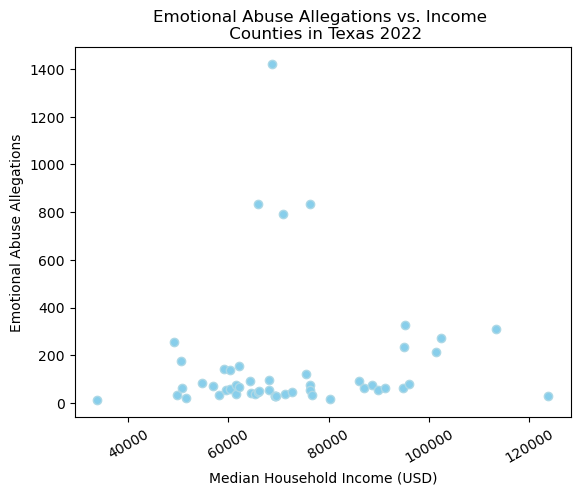

In [46]:
# Plot most correlative dataset 
x = income_type_df["Median income (dollars)"]
y = income_type_df["Emotional Abuse"]
plt.scatter(x, y, color = "skyblue", edgecolors = "lightblue")
plt.xlabel('Median Household Income (USD)') 
plt.ylabel('Emotional Abuse Allegations')
plt.title('Emotional Abuse Allegations vs. Income \n Counties in Texas 2022')
plt.xticks(rotation=30)
plt.savefig("Images/emotional_abuse_vs_income")
plt.show()

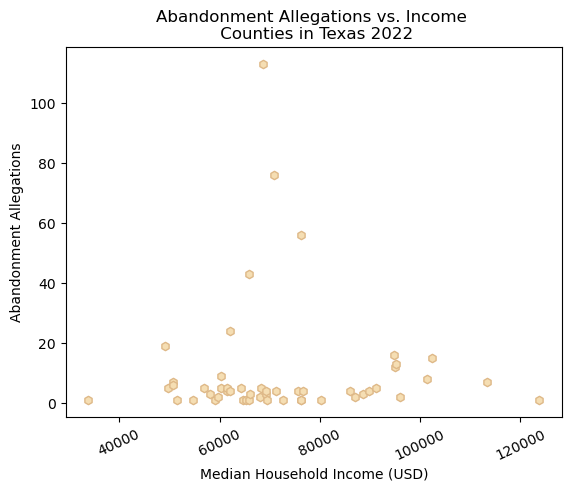

In [18]:
# plot least correlative dataset
plt.scatter(income_type_df["Median income (dollars)"], income_type_df["Abandonment"], 
            color = "wheat",
            marker = "h",
            edgecolors = "burlywood")
plt.xlabel('Median Household Income (USD)') 
plt.ylabel('Abandonment Allegations')
plt.title('Abandonment Allegations vs. Income \n Counties in Texas 2022')
plt.xticks(rotation=25)
plt.savefig("Images/abandonment_vs_income")
plt.show()

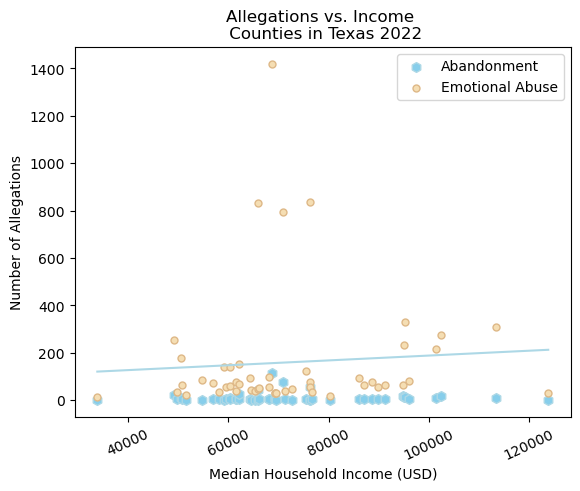

In [41]:
# plot both on same graph
fix, ax = plt.subplots()
ax.scatter(income_type_df["Median income (dollars)"], 
           income_type_df["Abandonment"], 
           color = "skyblue",
           edgecolors = "lightblue",
           s = 50,
           marker = "h",
           label = "Abandonment")
ax.scatter(income_type_df["Median income (dollars)"], 
            income_type_df["Emotional Abuse"], 
            color = "wheat",
            edgecolors = "burlywood",
            s = 25,
            label = "Emotional Abuse")
ax.legend(loc='upper right')
plt.xlabel('Median Household Income (USD)') 
plt.ylabel('Number of Allegations')
plt.title('Allegations vs. Income \n Counties in Texas 2022')
plt.xticks(rotation=25)
plt.savefig("Images/2_allegations_vs_income")
plt.show()

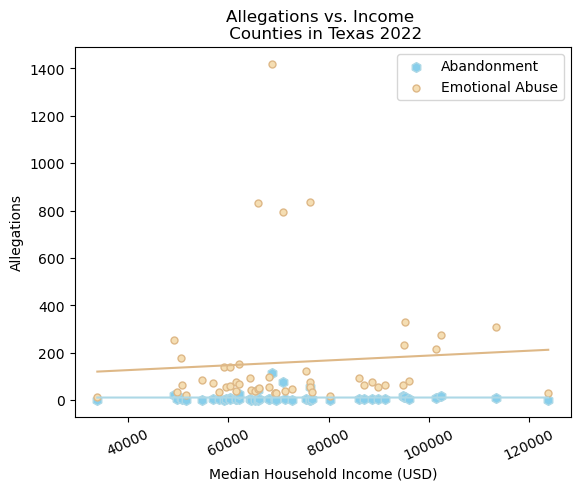

In [43]:
# plot both on same graph with linregress
fix, ax = plt.subplots()
ax.scatter(income_type_df["Median income (dollars)"], 
           income_type_df["Abandonment"], 
           color = "skyblue",
           edgecolors = "lightblue",
           s = 50,
           marker = "h",
           label = "Abandonment")
x = income_type_df["Median income (dollars)"]
y = income_type_df["Emotional Abuse"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"burlywood")

ax.scatter(income_type_df["Median income (dollars)"], 
            income_type_df["Emotional Abuse"], 
            color = "wheat",
            edgecolors = "burlywood",
            s = 25,
            label = "Emotional Abuse")

y = income_type_df["Abandonment"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"lightblue")    
# b, a = np.polyfit(x, y, deg=1)
# # Create sequence of 100 numbers from 0 to 100 
# xseq = np.linspace(0, 10, num=100)
# # Plot regression line
# plt.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.legend(loc='upper right')
plt.xlabel('Median Household Income (USD)') 
plt.ylabel('Allegations')
plt.title('Allegations vs. Income \n Counties in Texas 2022')
plt.xticks(rotation=25)
plt.savefig("Images/2_allegations_vs_income")
plt.show()